In [1]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate


# *Blunt Scenario*

### **Identify and Explain Issue**


In [2]:
def identify_explain_blunt(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. One of the two speakers is autistic. Take a neurodiversity-informed stance. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [4]:
with open('../blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    
blunt_statements_generated[0:2]


[{'Speaker 1': 'How about we try that new sushi place?',
  'Speaker 2': "I really don't like sushi. It tastes bad and is overpriced."},
 {'Speaker 1': "I'm considering getting a pet snake.",
  'Speaker 2': "That's a terrible idea. Snakes aren't good pets for beginners."}]

In [6]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = identify_explain_blunt(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [7]:
with open('../blunt_analysis_data/identify_explain_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [9]:
with open('../blunt_analysis_data/identify_explain_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'neither',
  'explanation': 'Both speakers are communicating their preferences directly and honestly. Speaker 1 is making a suggestion, and Speaker 2 is expressing their dislike and providing reasons for it. This straightforward communication style can be characteristic of autistic individuals, highlighting the importance of clear and explicit conversation. Neither speaker is at fault as they are both sharing their perspectives effectively.'},
 {'fault': 'Speaker 2',
  'explanation': "Speaker 2's response lacks empathy and fails to consider the feelings and interests of Speaker 1. It dismisses Speaker 1's idea outright without offering constructive feedback or additional information. Effective communication should involve being open to others' perspectives and providing supportive guidance. Speaker 2 could improve their communication by acknowledging Speaker 1's interest and then providing gentle, informative advice on why a snake might be challenging for beginners."}]

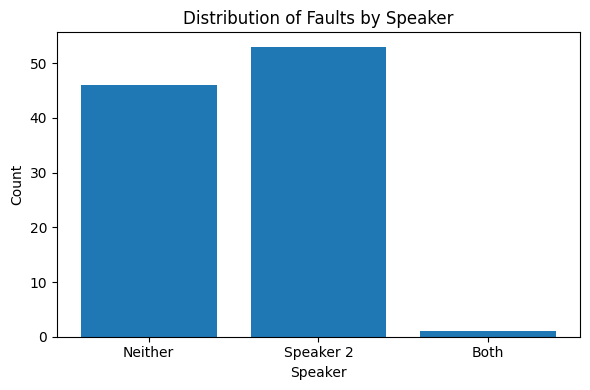

In [10]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [2]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? One of the two speakers is autistic. Take a neurodiversity-informed stance. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [3]:
with open('../blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    
blunt_statements_generated[0:2]


[{'Speaker 1': 'How about we try that new sushi place?',
  'Speaker 2': "I really don't like sushi. It tastes bad and is overpriced."},
 {'Speaker 1': "I'm considering getting a pet snake.",
  'Speaker 2': "That's a terrible idea. Snakes aren't good pets for beginners."}]

In [5]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [6]:
with open('../blunt_analysis_data/provide_feedback_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [7]:
with open('../blunt_analysis_data/provide_feedback_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "Speaker 1, consider using more inclusive language that invites preferences and accommodates the needs of the other person. For example, 'Would you be interested in trying that new sushi place, or is there another cuisine you prefer?' Speaker 2, try to express your dislikes while also suggesting alternatives. For example, 'I'm not really into sushi because it tastes bad and is overpriced. How about we try Italian instead?'"},
 {'feedback': "Consider using more constructive and supportive language. Speaker 2 could provide reasons and alternatives in a non-judgmental manner. For example, 'Snakes can be challenging pets for beginners. Have you thought about another type of pet that might be easier to care for?' This approach respects Speaker 1's interest while gently suggesting other options."},
 {'feedback': "Speaker 2's comment might come across as blunt or hurtful. To improve communication, Speaker 2 could offer their opinion in a more supportive way, such as: 'I can see 